In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
data = pd.read_csv('social.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
feature_cols = ['Age','EstimatedSalary' ] 
X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

# The next step is to split the dataset into training and test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [24]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [26]:
#prediction
y_pred = classifier.predict(X_test)#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.91


# The decision tree classifier gave an accuracy of 91%

# Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [28]:
conda install python-graphviz


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https//repo.anaconda.com/pkgs/main/win-64'




In [29]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


# Let us first visualize the model prediction results.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


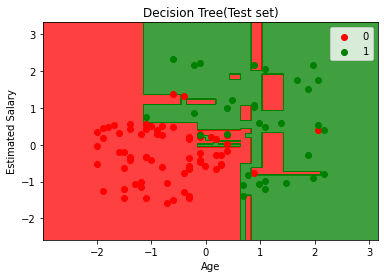

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop= X_set[:,0].max()+1, step = 0.01),np.arange(start = X_set[:,1].min()-1, stop= X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(("red","green")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1], c = ListedColormap(("red","green"))(i),label = j)
plt.title("Decision Tree(Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

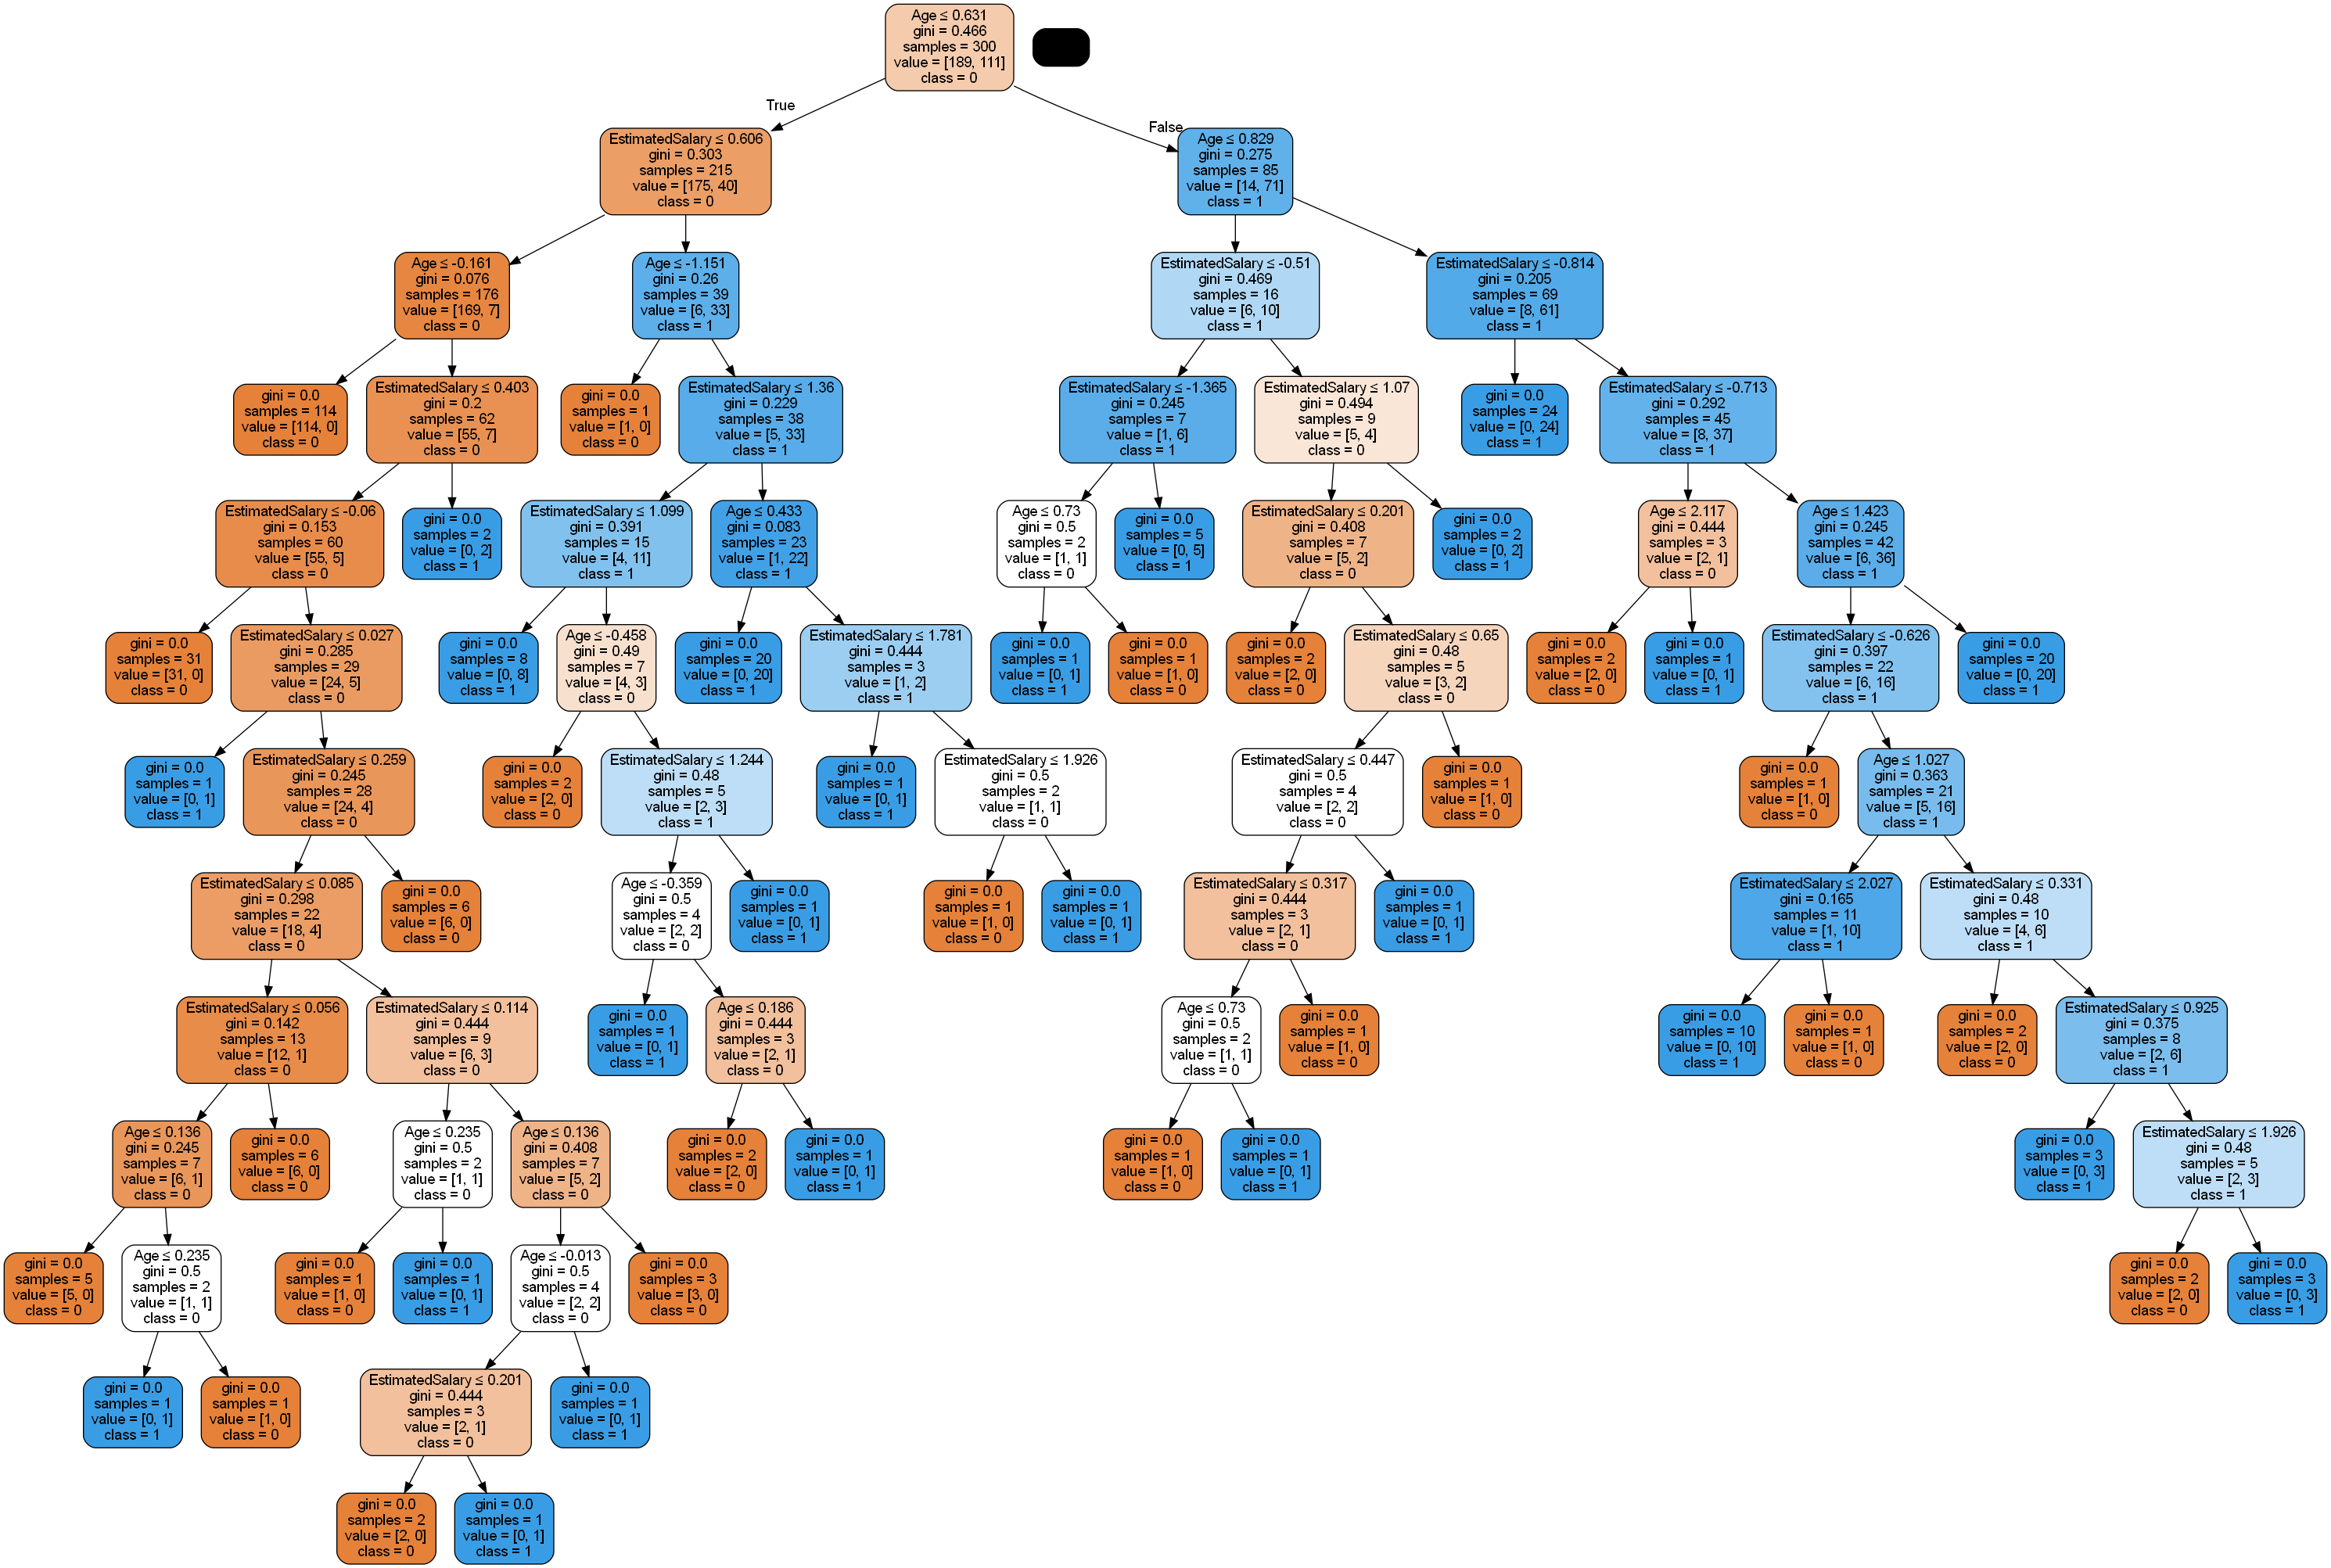

In [31]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus 
dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [32]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)#Predict the response for test dataset
y_pred = classifier.predict(X_test)# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.94


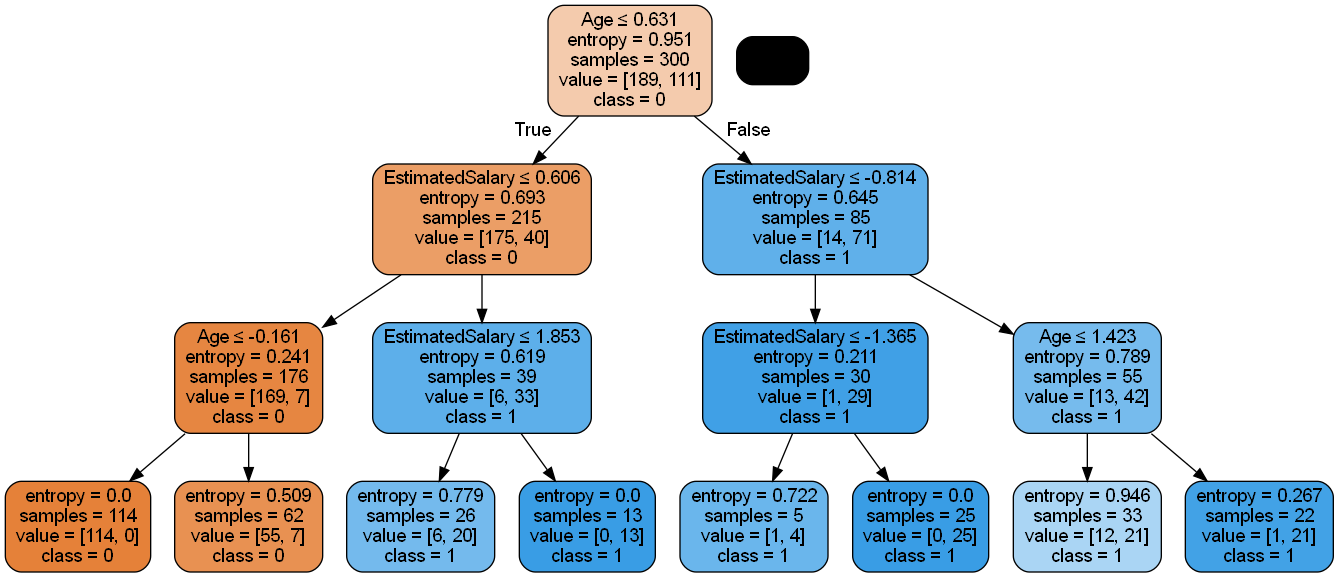

In [33]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplusdot_data.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())